# The Bisection Method

The bisection method is a numerical algorithm used to find the roots of a continuous function. It works by repeatedly dividing an interval in half and then selecting the subinterval in which the function changes sign, and then dividing that subinterval in half again. This process is repeated until the interval becomes small enough to approximate the root of the function with a desired level of accuracy. The bisection method is guaranteed to converge to a root of the function, but it may converge slowly for some functions. It is a relatively simple and reliable method for finding roots, but it may require many iterations to achieve a desired level of accuracy.

Given a continuous function $f(x)$ and an interval $[a,b]$ such that $f(a)$ and $f(b)$ have opposite signs, the bisection method generates a sequence of approximations $p_n$ of a root of $f(x)$ as follows:

\begin{align*}
p_n &= \frac{a_n + b_n}{2} \
\
\text{if } f(a_n) \cdot f(p_n) &< 0 \
\quad b_{n+1} &= p_n \
\text{else } \
\quad a_{n+1} &= p_n
\end{align*}

The process is repeated until an approximation of the root with the desired accuracy is achieved. Here, $a_n$ and $b_n$ represent the endpoints of the interval at the $n$th iteration of the method, and $p_n$ is the midpoint of the interval. The condition $f(a_n) \cdot f(p_n) < 0$ checks if the root lies in the interval $[a_n, p_n]$, and if it does, the endpoint $b_n$ is updated to $p_n$, otherwise the endpoint $a_n$ is updated to $p_n$

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def bisection(f, a, b, tol=1e-6, max_iter=100):
    """
    Implements the bisection method to find the root of a function f
    within the interval [a,b].

    Parameters:
    f (function): the function to find the root of
    a (float): the left endpoint of the interval
    b (float): the right endpoint of the interval
    tol (float): the tolerance level for the root
    max_iter (int): the maximum number of iterations to perform

    Returns:
    x (float): the estimated root of f within the interval [a,b]
    """

    # Ensure that the function has different signs at a and b
    if np.sign(f(a)) == np.sign(f(b)):
        raise ValueError("f(a) and f(b) must have opposite signs")

    # Initialize the midpoint, iteration counter, and lists for plotting
    x = (a + b) / 2
    i = 0
    x_vals = [a, b]
    y_vals = [f(a), f(b)]

    # Loop until the tolerance is met or the maximum number of iterations is reached
    while abs(f(x)) > tol and i < max_iter:
        # Determine which half of the interval to keep
        if np.sign(f(x)) == np.sign(f(a)):
            a = x
        else:
            b = x

        # Calculate the new midpoint and update the plotting lists
        x = (a + b) / 2
        x_vals.append(x)
        y_vals.append(f(x))

        # Increment the iteration counter
        i += 1

    # Plot the function and the bisection points
    x_range = np.linspace(a, b, 100)
    plt.scatter(x_range, f(x_range))
    plt.plot(x_vals, y_vals, '--ro')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Bisection Method')

    # Return the estimated root
    return x

The root of f(x) within the interval [-10, 10] is approximately 2.094551


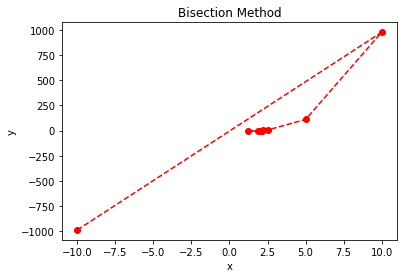

In [2]:
# Define the function to find the root of
def f(x):
    return x**3 - 2*x - 5

# Find the root using the bisection method
a, b = -10, 10
root = bisection(f, a, b)

# Print the result
print(f"The root of f(x) within the interval [{a}, {b}] is approximately {root:.6f}")

# Show the plot
plt.show()